<a href="https://colab.research.google.com/github/HangyeomLee/Cyclica_Hackathon_Challenge/blob/main/Toyota_image_extract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

import cv2

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

from IPython.display import display, Javascript, Image

from google.colab.output import eval_js
from base64 import b64decode, b64encode
import PIL
import io
import html
import time
import math

#Get Python and OpenCV Version

print('OpenCV-Python Lib Version:', cv2.__version__)
print('Python Version:',sys.version)

folder_path = "/content/gdrive/MyDrive/Toyota Innovation Challenge Documents/Training Images/White"

OpenCV-Python Lib Version: 4.7.0
Python Version: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]


In [ ]:

def get_image_file_list(folder_path):
    image_extensions = ['.jpg', '.jpeg', '.png', '.bmp']  # 이미지 파일 확장자들

    file_list = os.listdir(folder_path)  # 폴더 내 모든 파일 목록 가져오기
    image_files = []  # 이미지 파일 목록을 담을 리스트

    for file in file_list:
        _, ext = os.path.splitext(file)
        if ext.lower() in image_extensions:
            image_files.append(os.path.join(folder_path, file))

    return image_files


In [ ]:
MainImgBGR = get_image_file_list(folder_path)
Origin_image = get_image_file_list(folder_path)

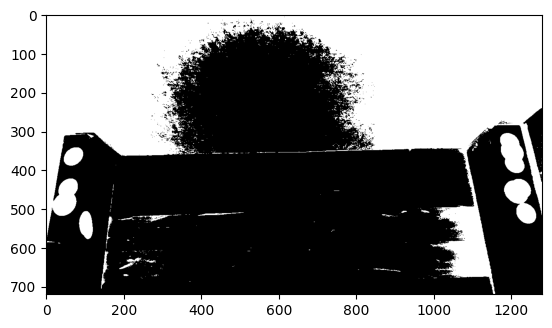

In [ ]:
for i, file_path in enumerate(MainImgBGR):
    # Load the image
    img = cv2.imread(file_path)

    # Convert to Gray
    img_gry = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Convert to Binary
    # Method: Basic Thresholding
    ret, img_bin = cv2.threshold(img_gry, 127, 255, cv2.THRESH_BINARY)
    ret, img_bininv = cv2.threshold(img_gry, 127, 255, cv2.THRESH_BINARY_INV)

    # Method: Adaptive Thresholding
    img_adp_gusbin = cv2.adaptiveThreshold(img_gry, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 5, 5)
    img_adp_meanbin = cv2.adaptiveThreshold(img_gry, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 5, 5)

    # Method: Otsu's Thresholding
    ret, img_Otsubin = cv2.threshold(img_gry, 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    plt.imshow(img_Otsubin, cmap='binary')
    img_blur = cv2.GaussianBlur(img, (17, 17), 0)
    MainImgBGR[i] = img_blur


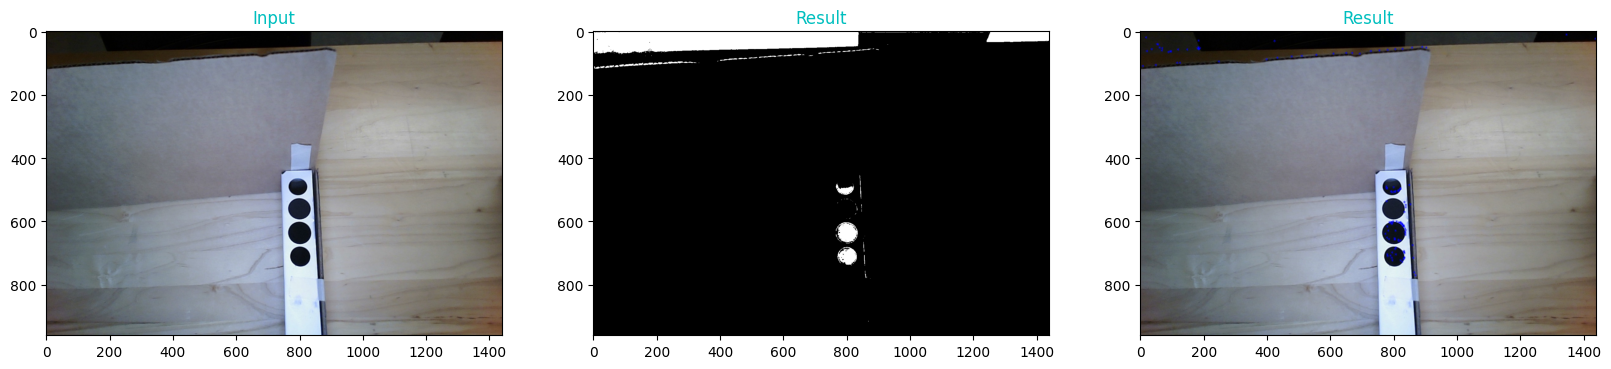

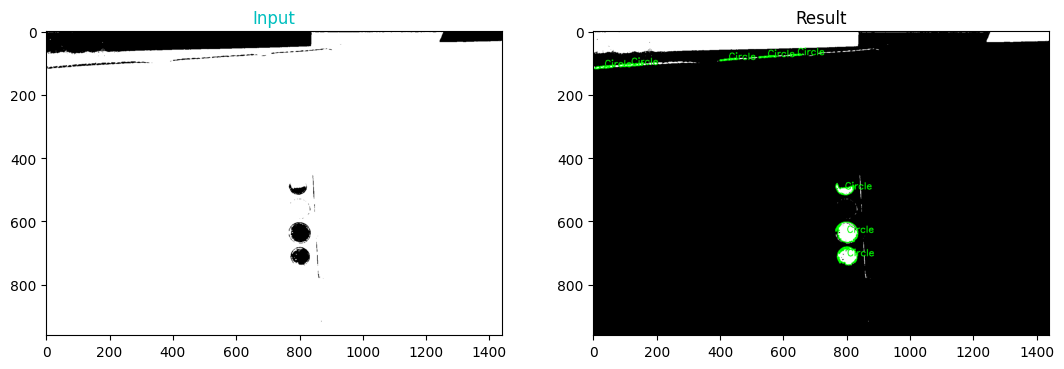

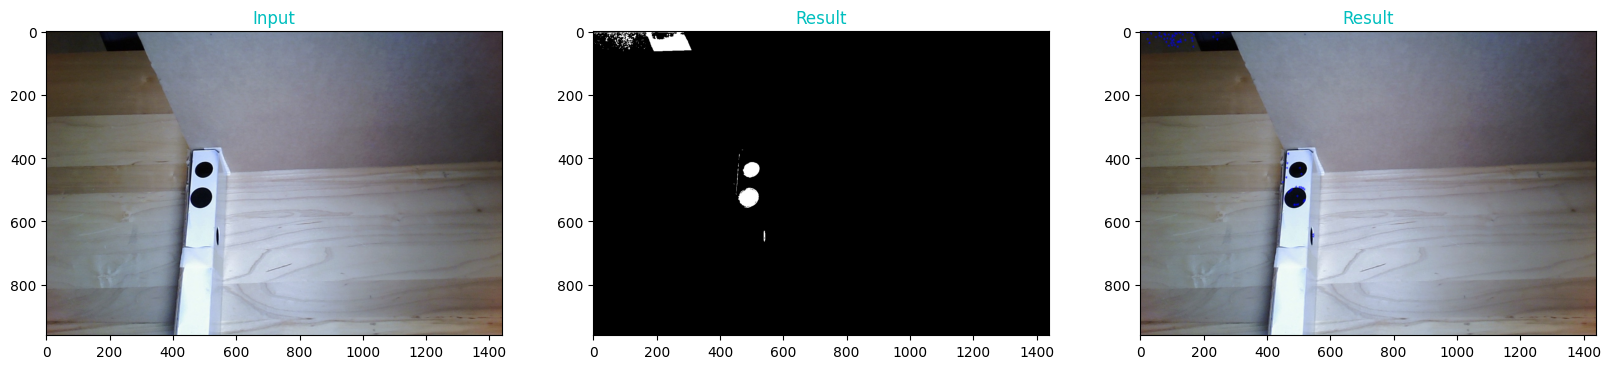

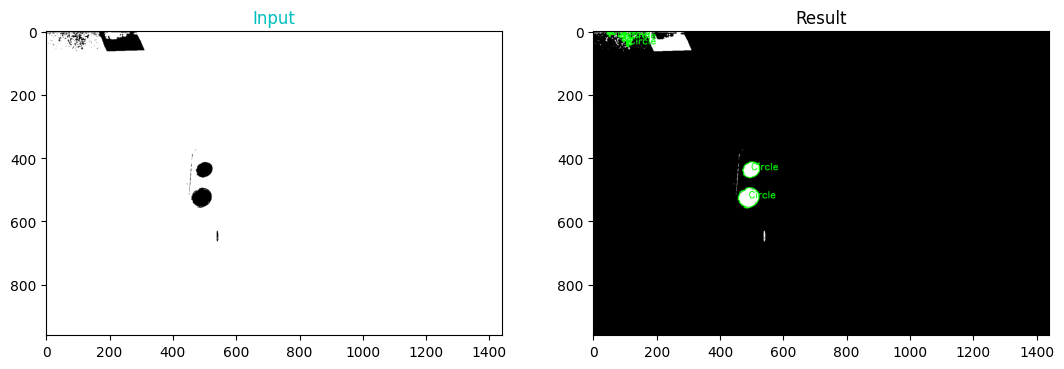

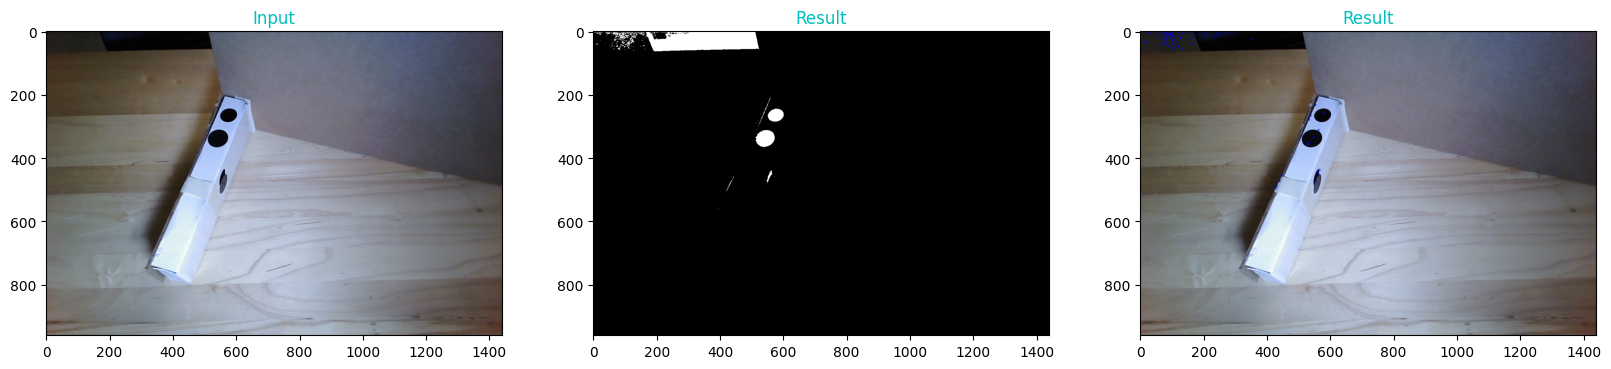

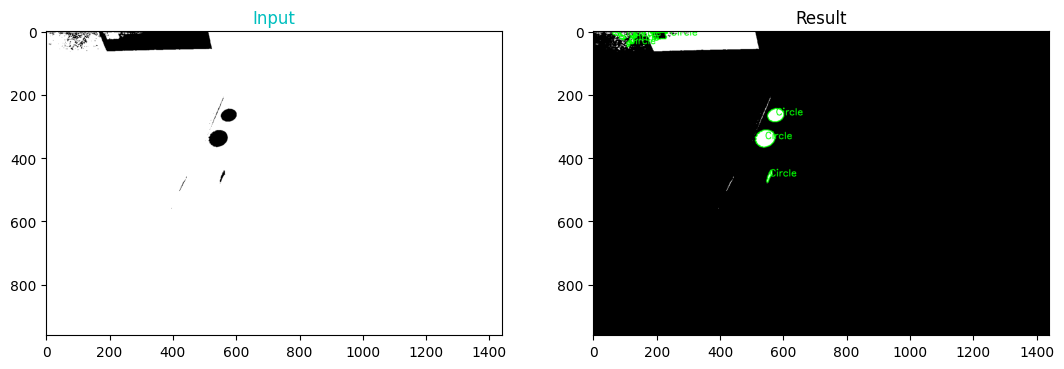

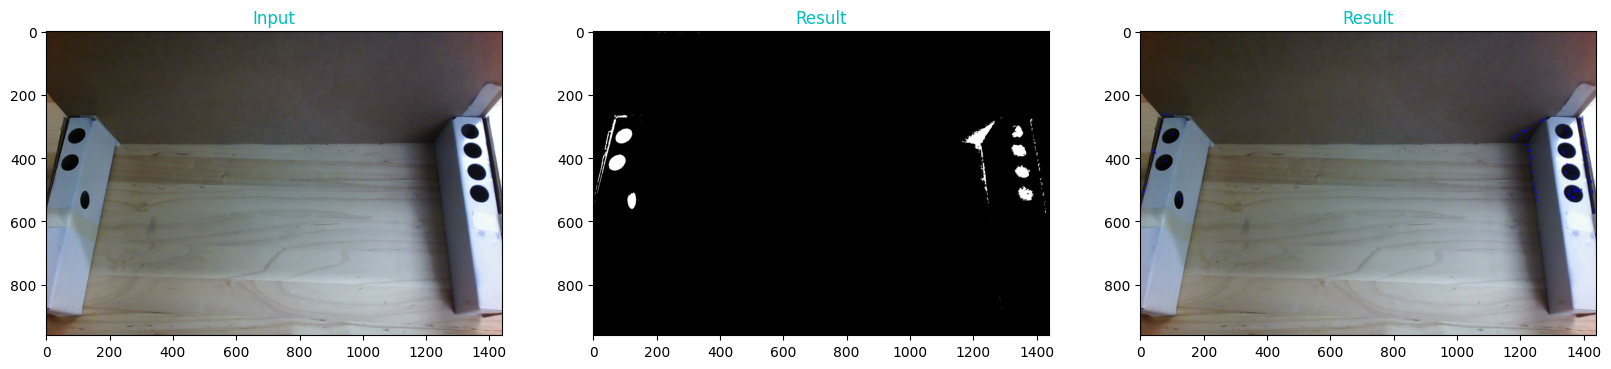

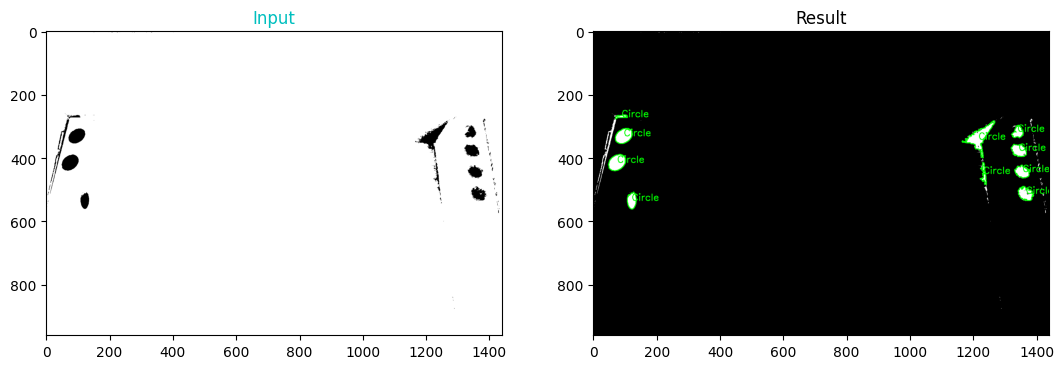

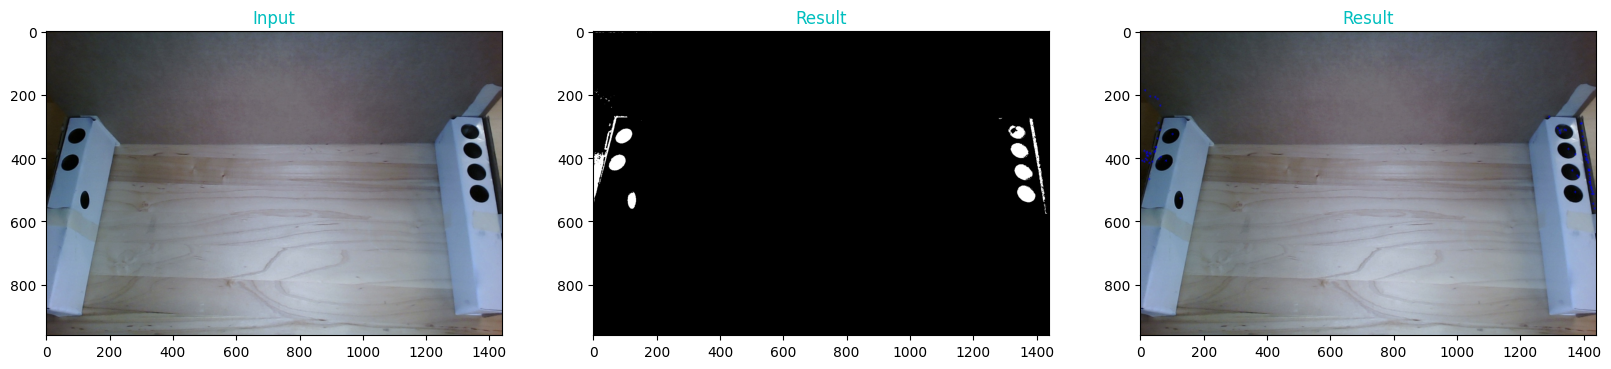

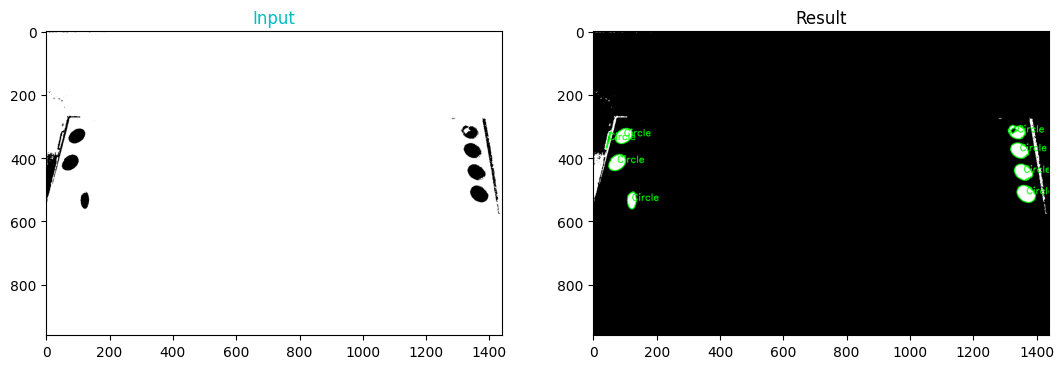

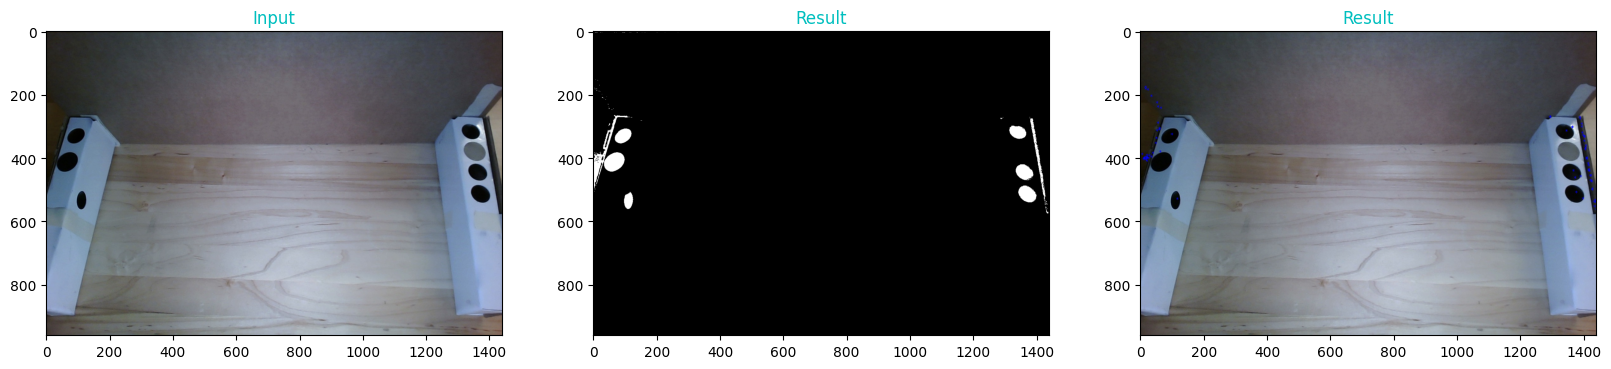

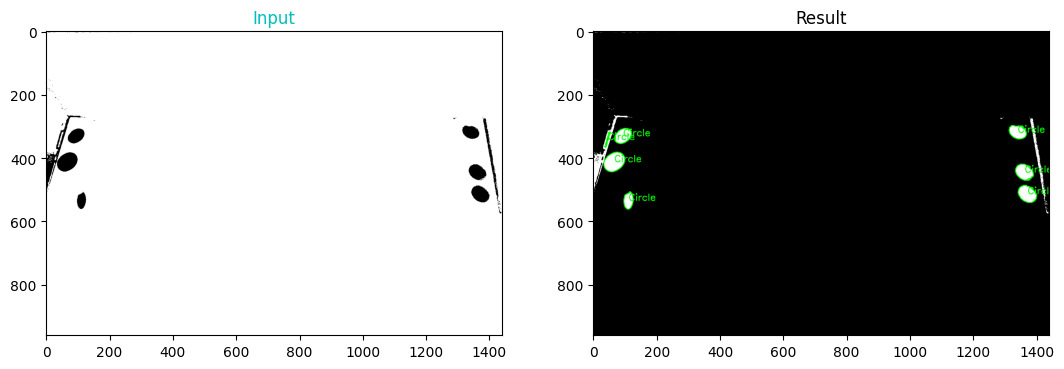

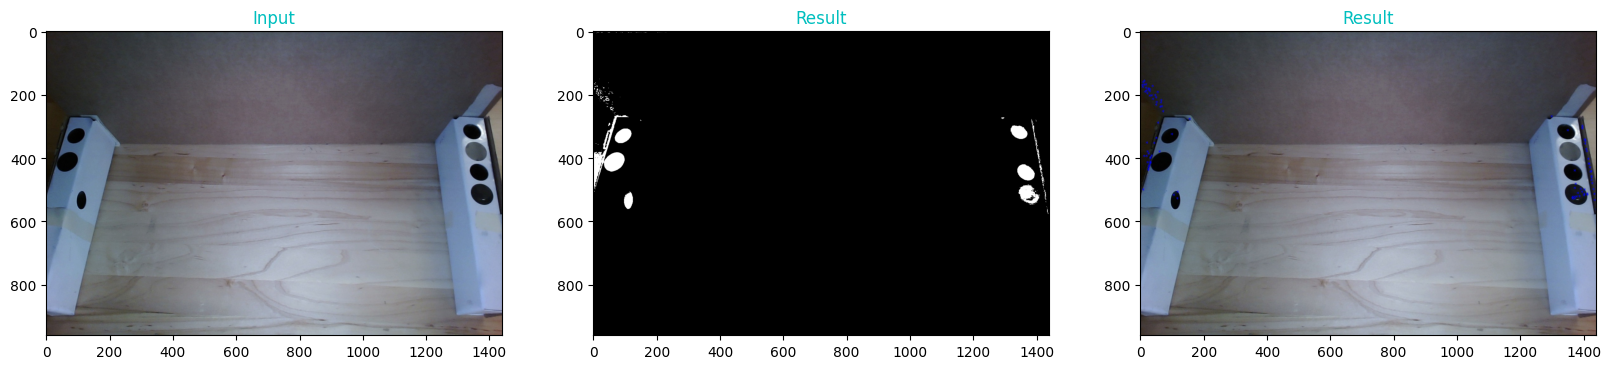

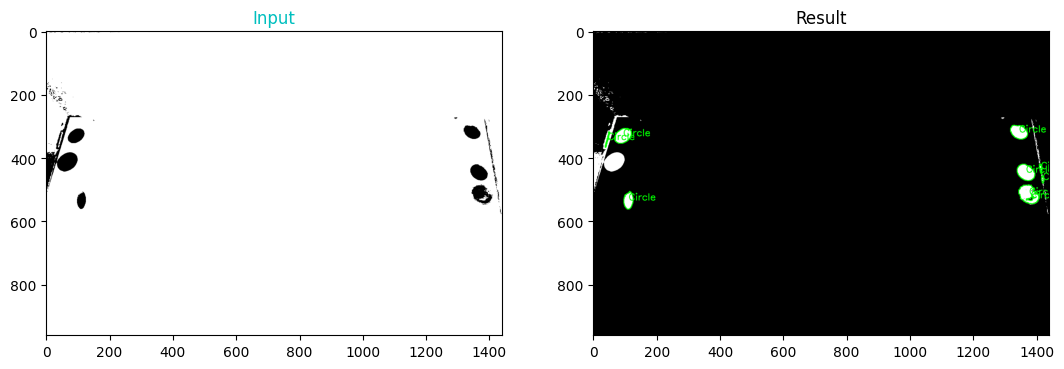

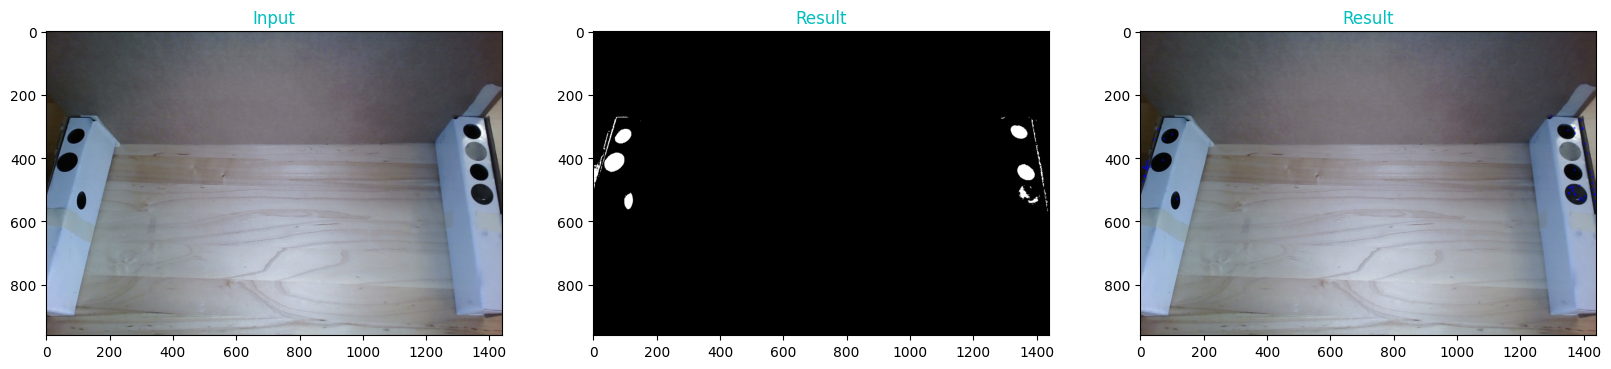

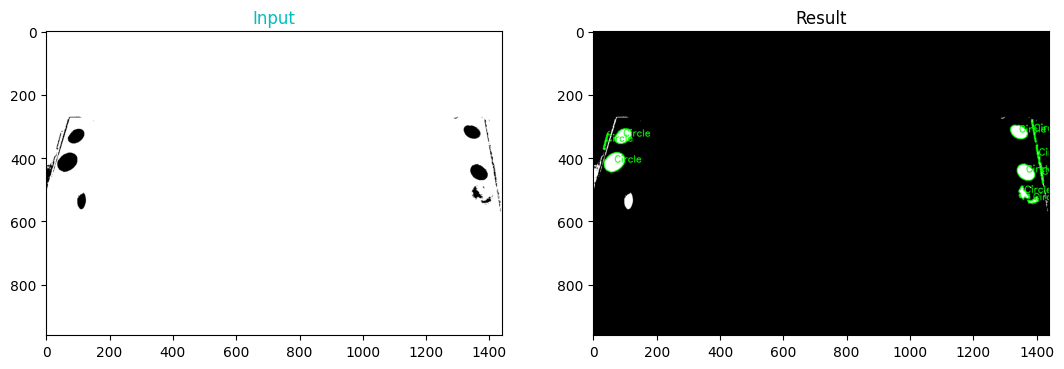

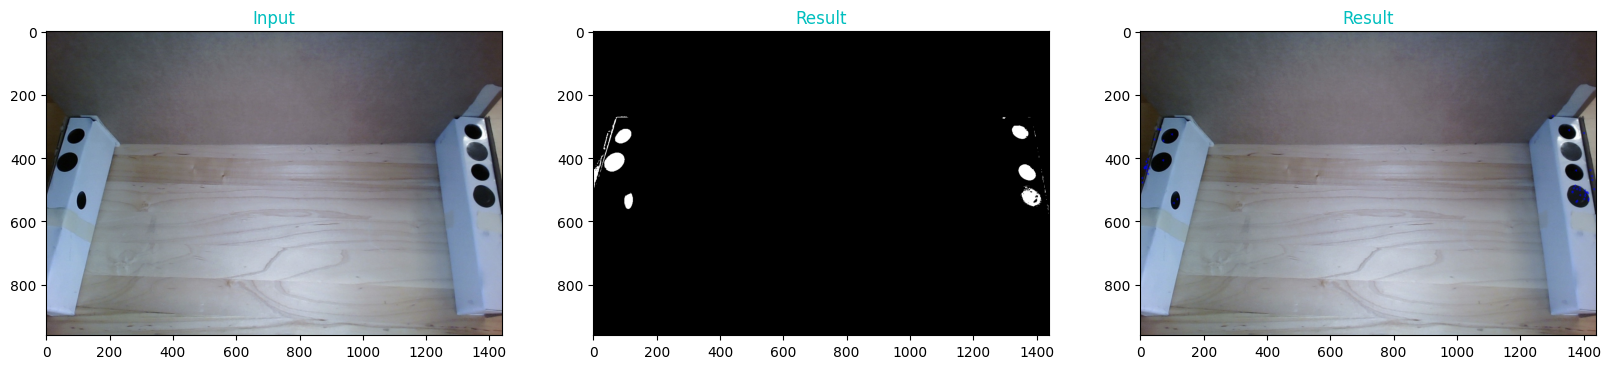

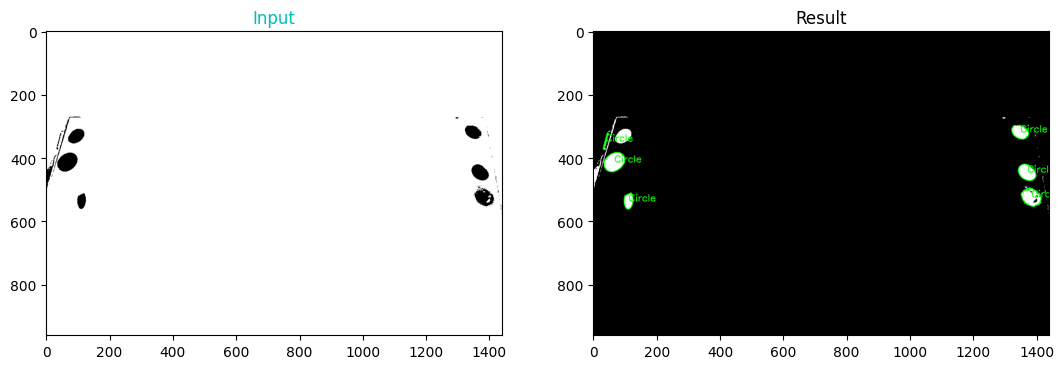

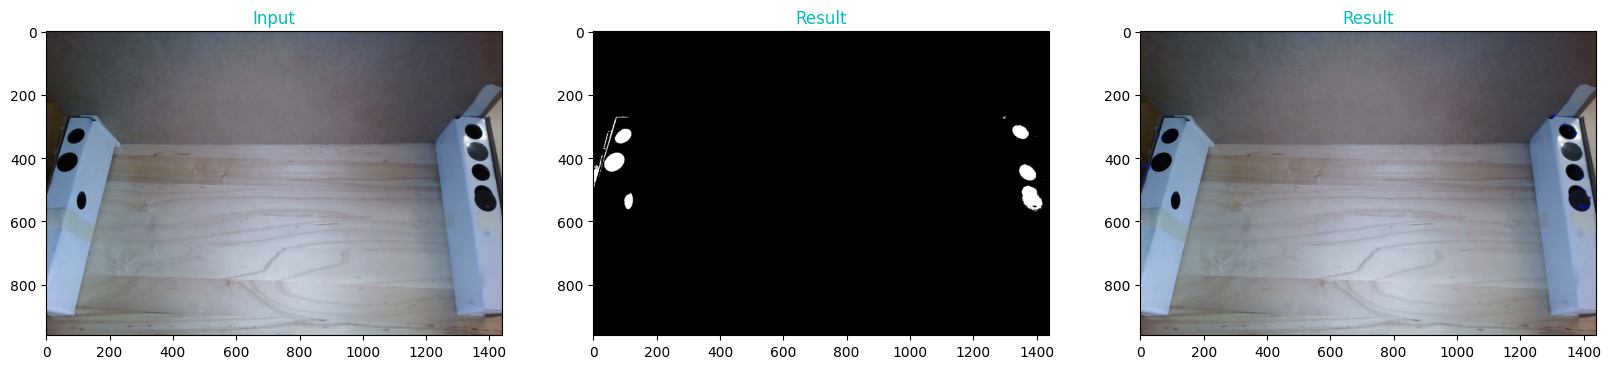

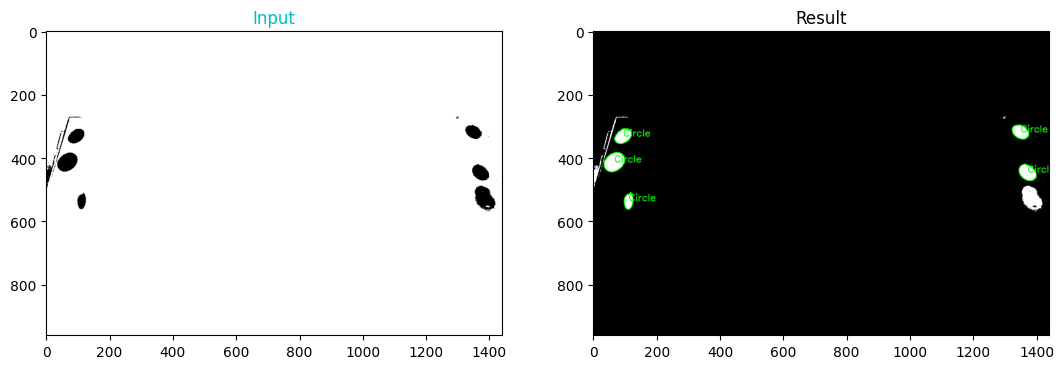

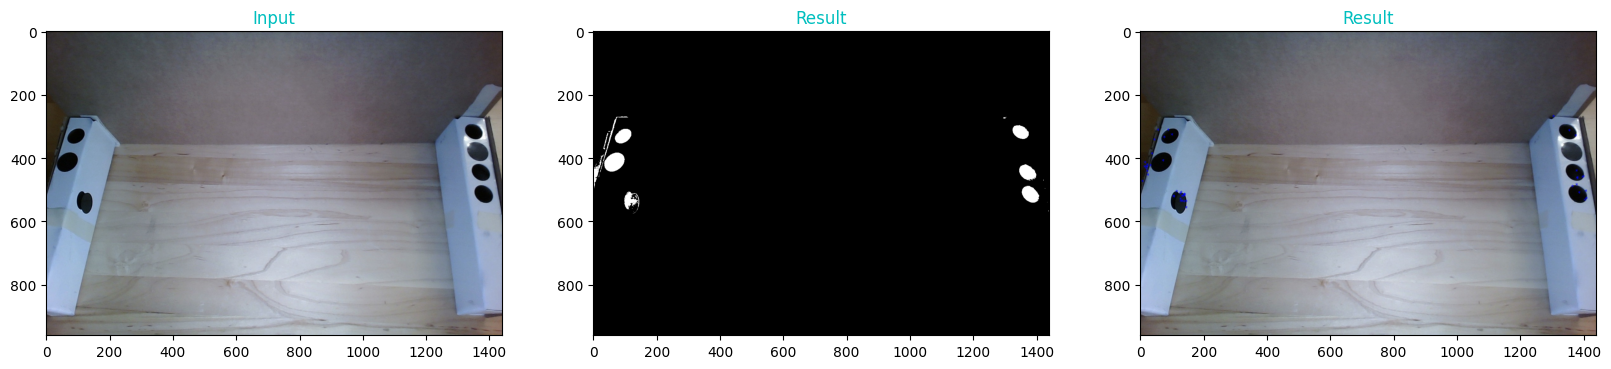

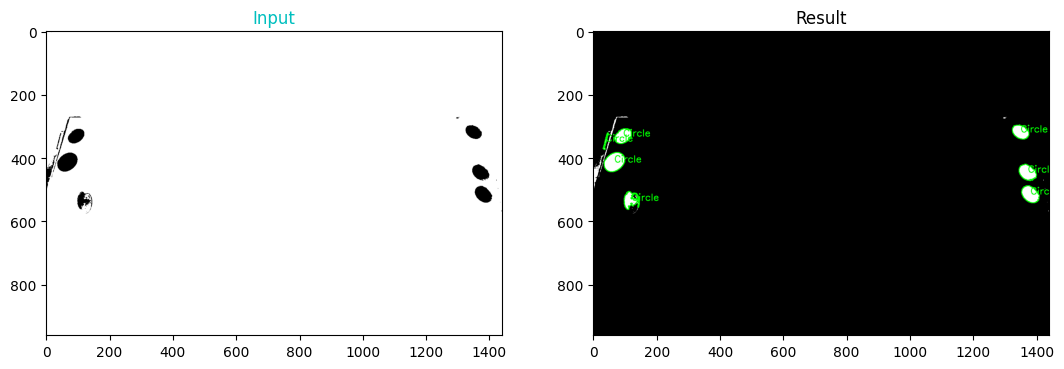

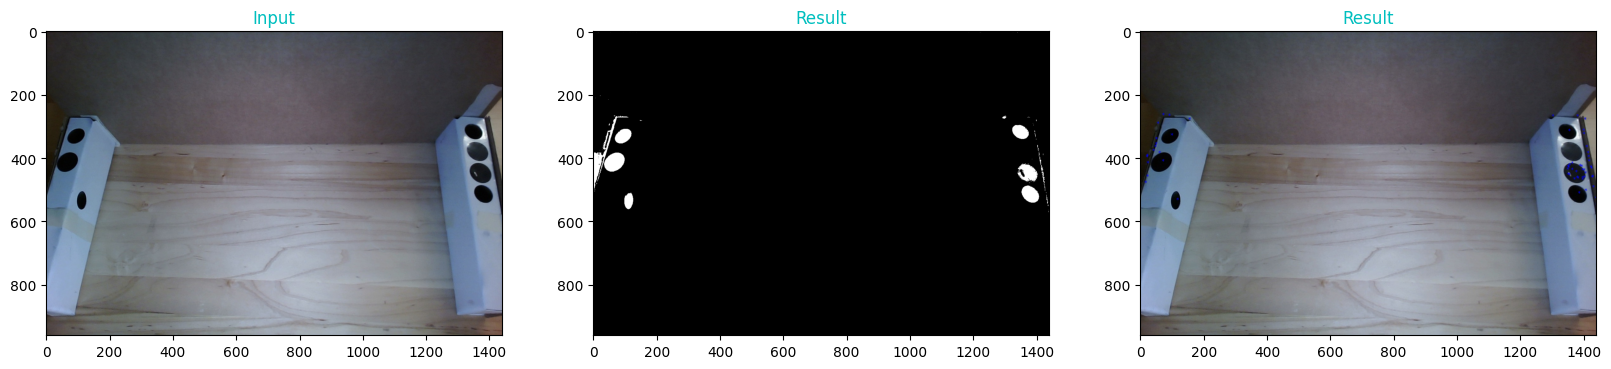

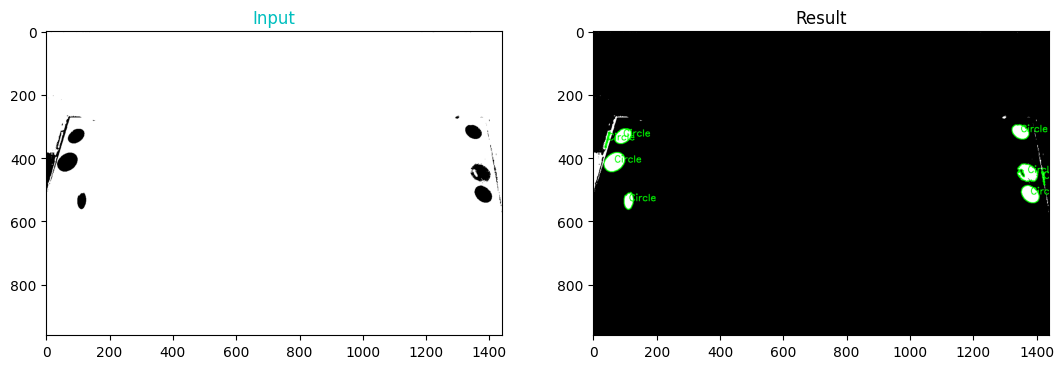

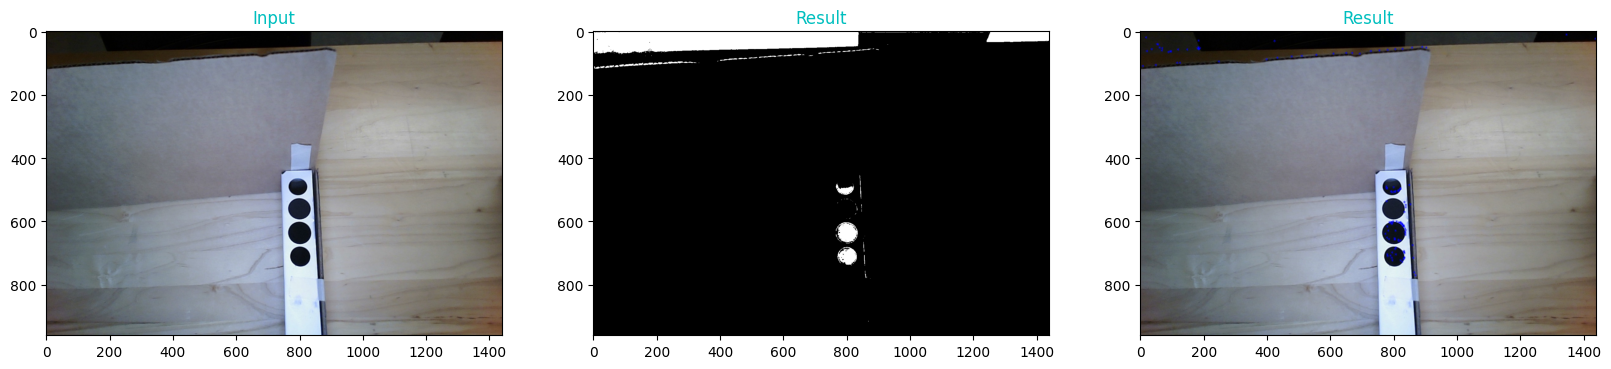

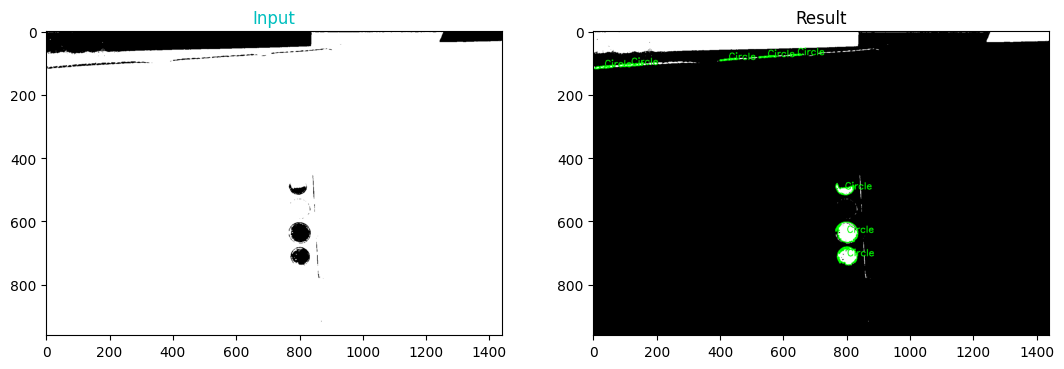

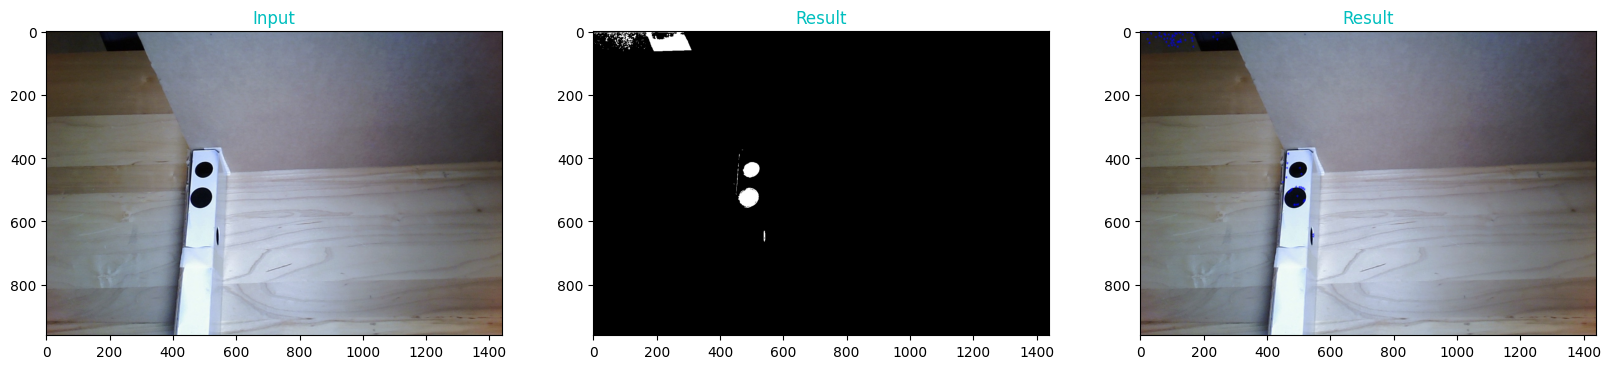

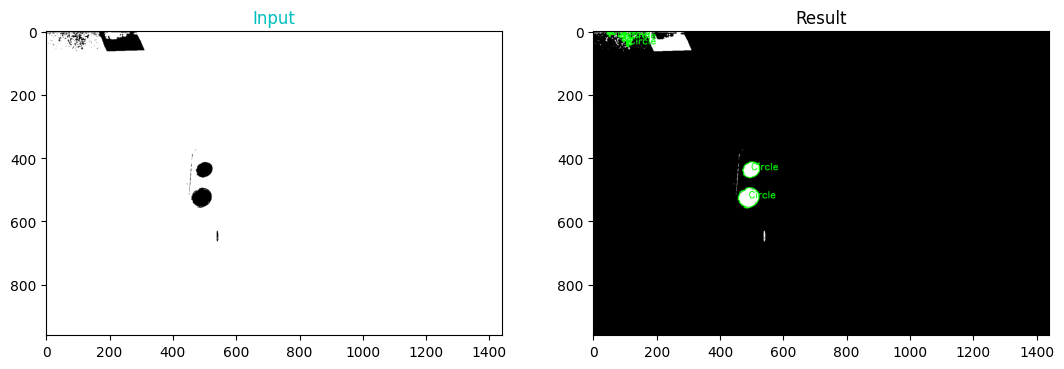

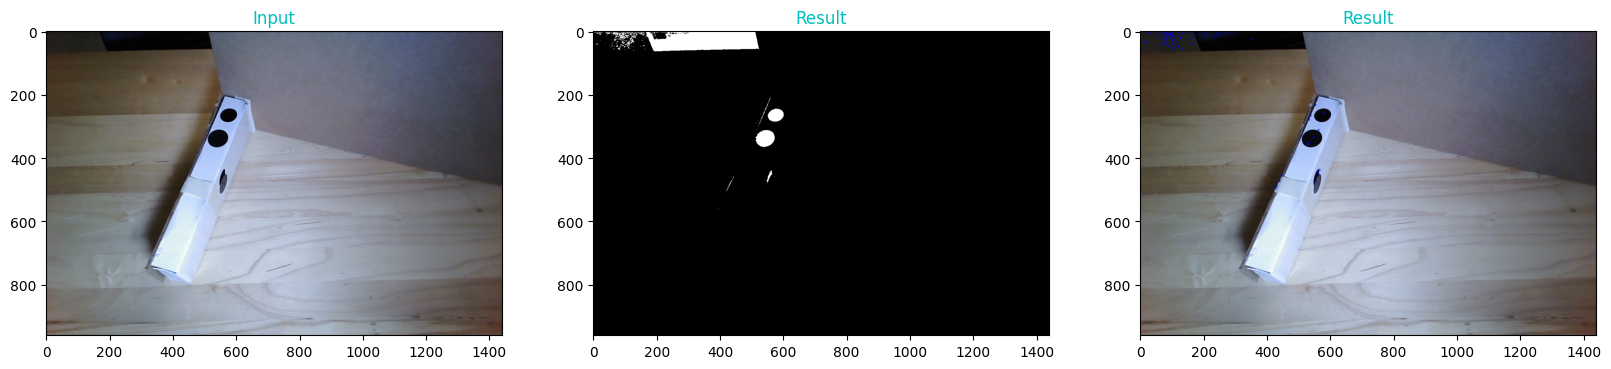

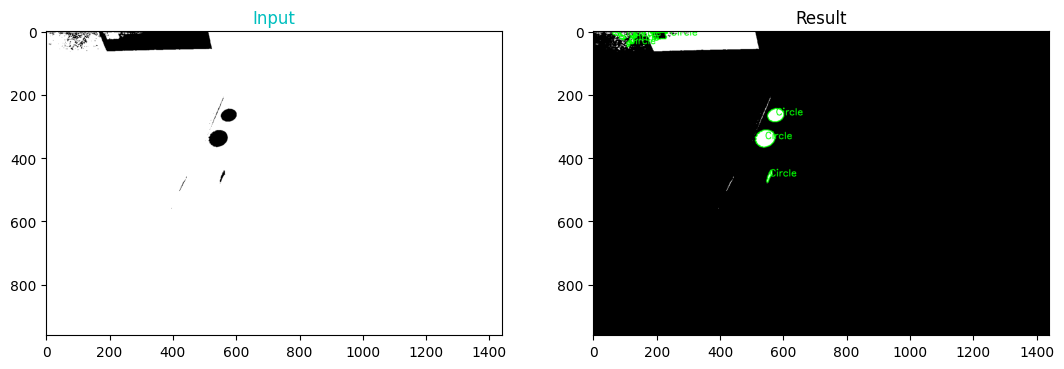

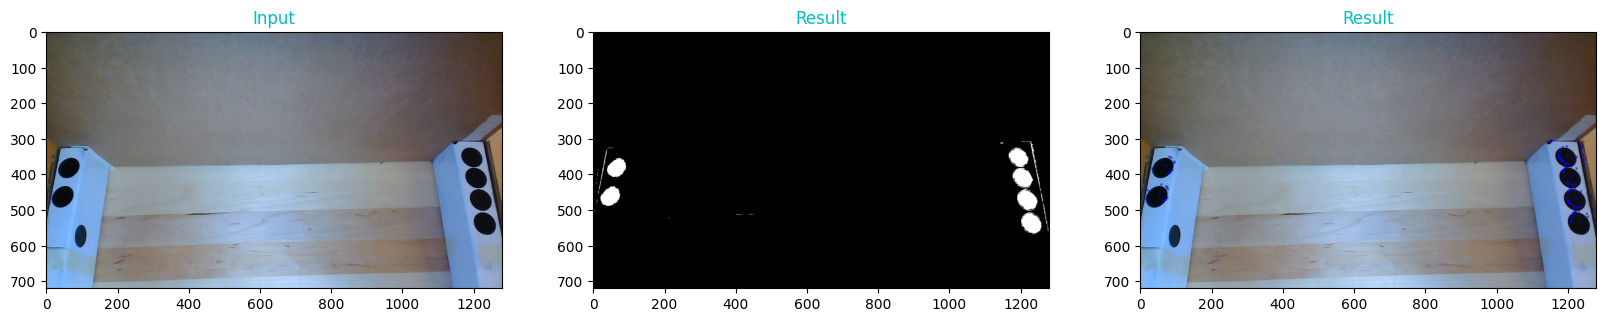

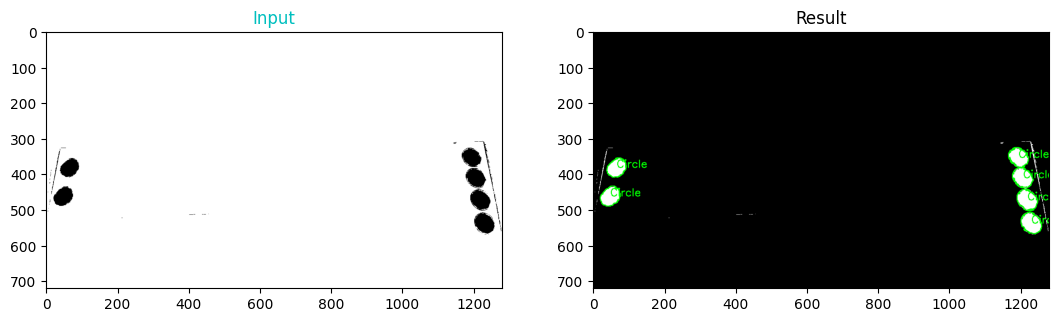

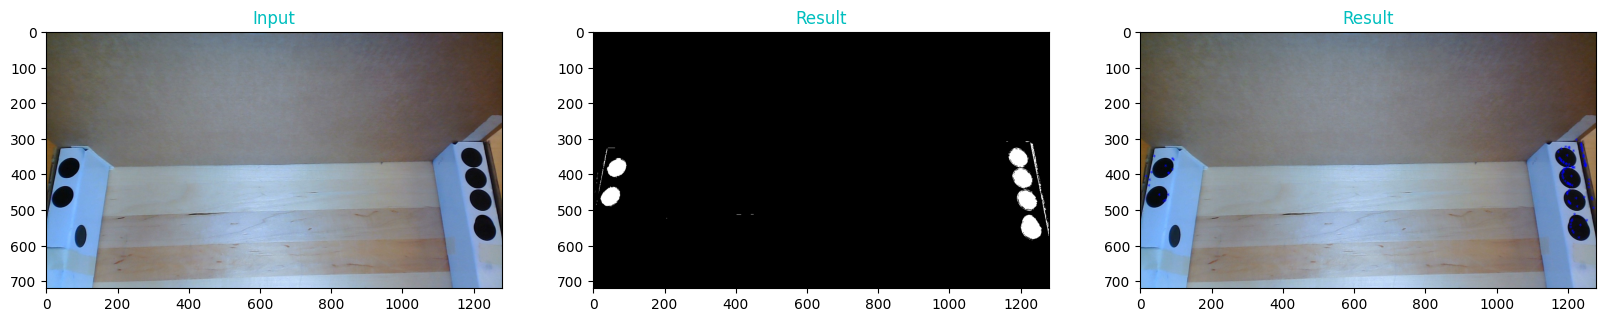

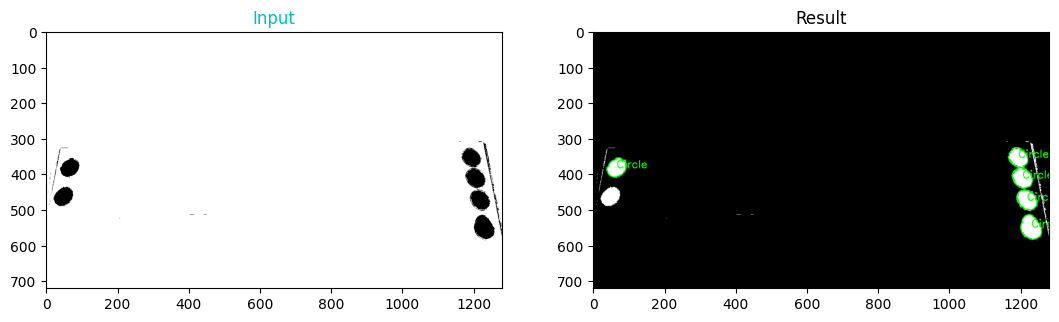

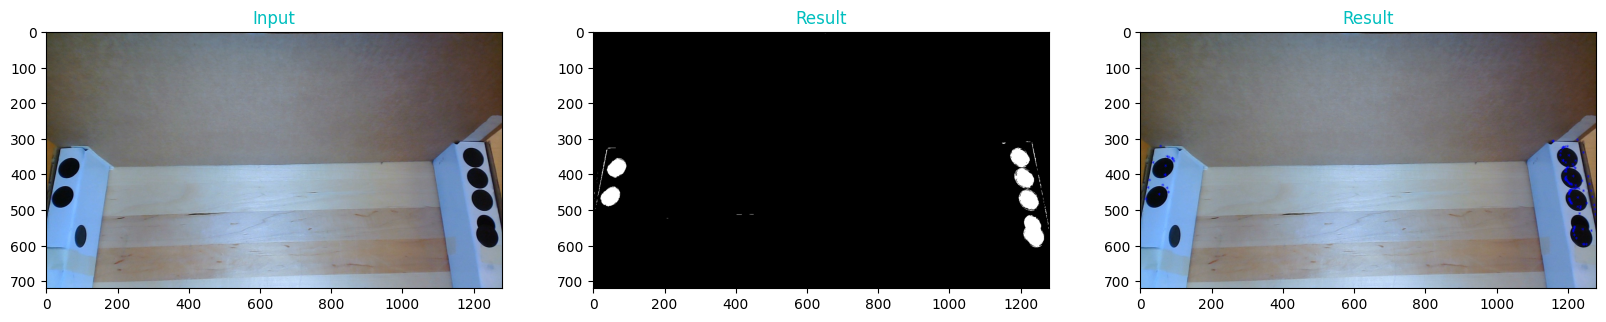

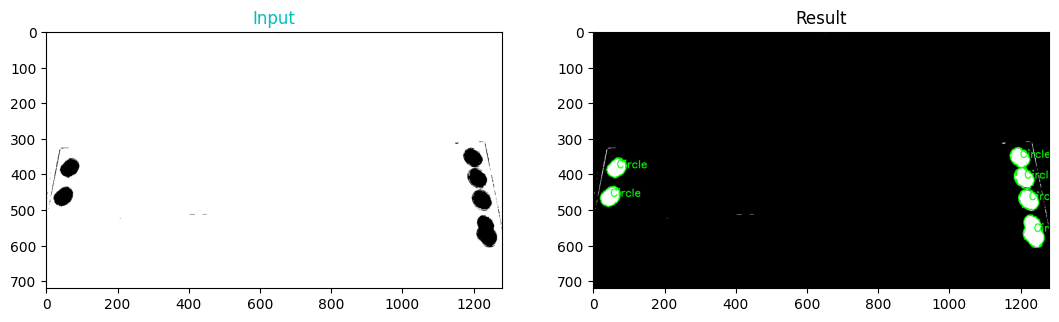

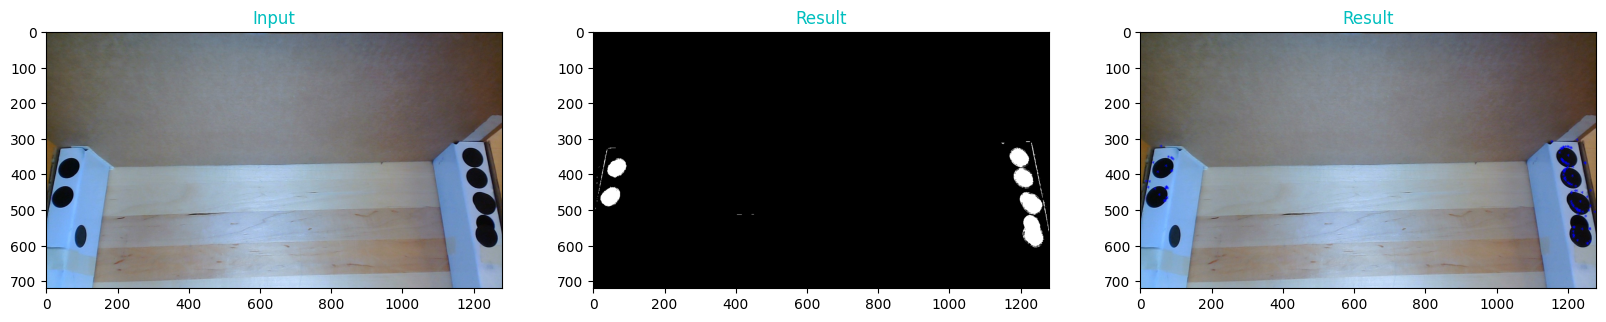

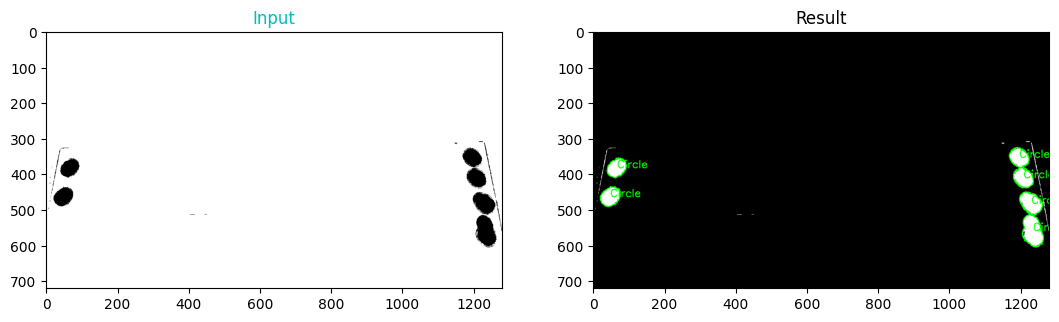

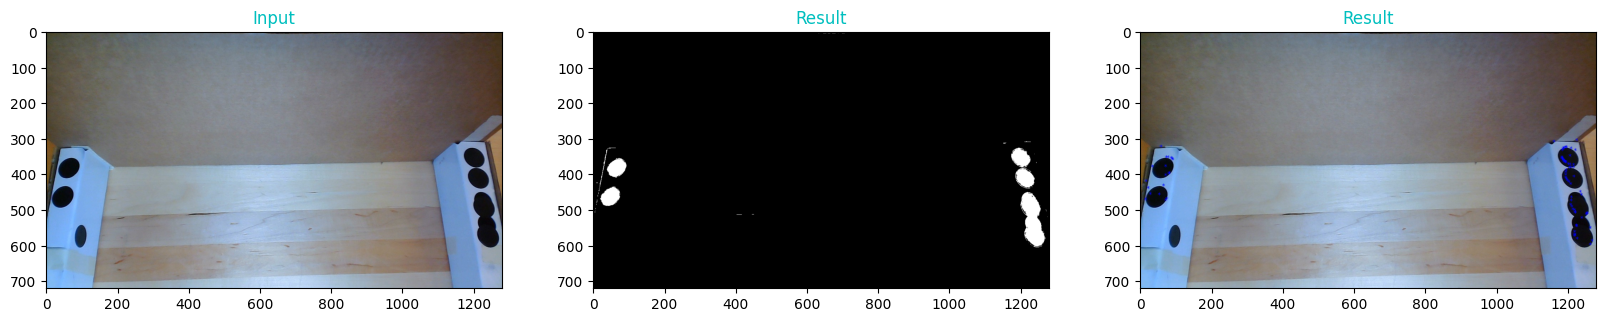

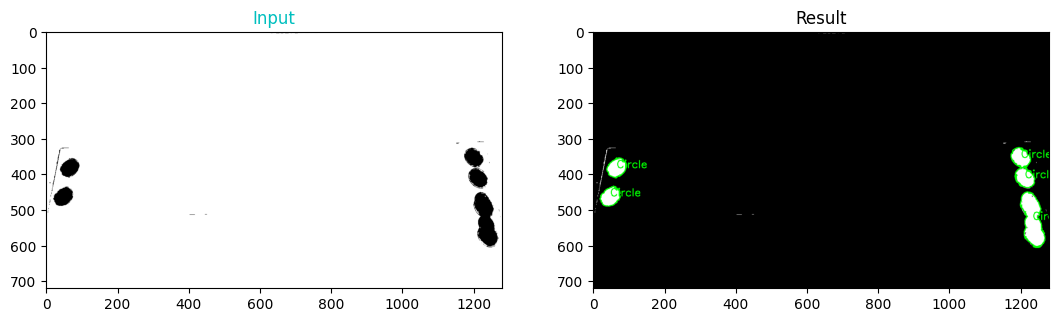

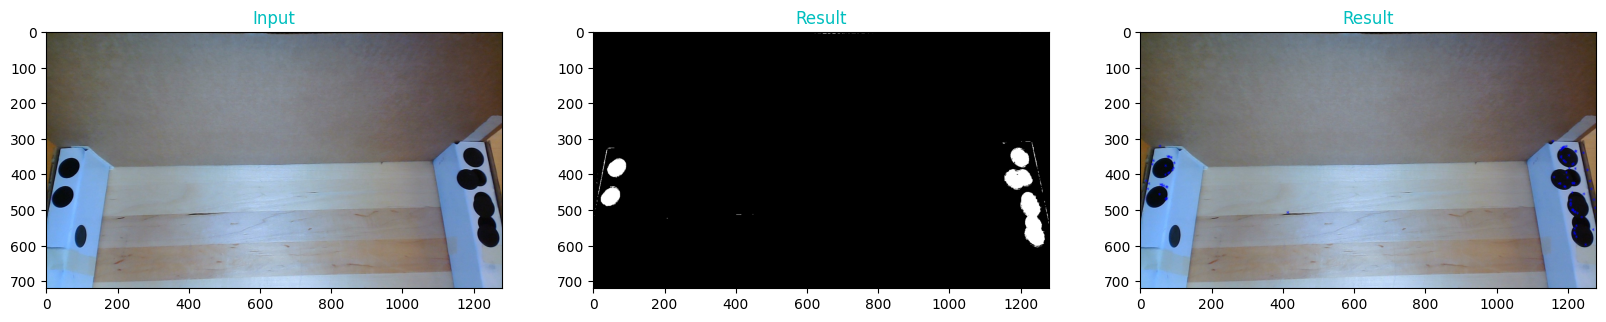

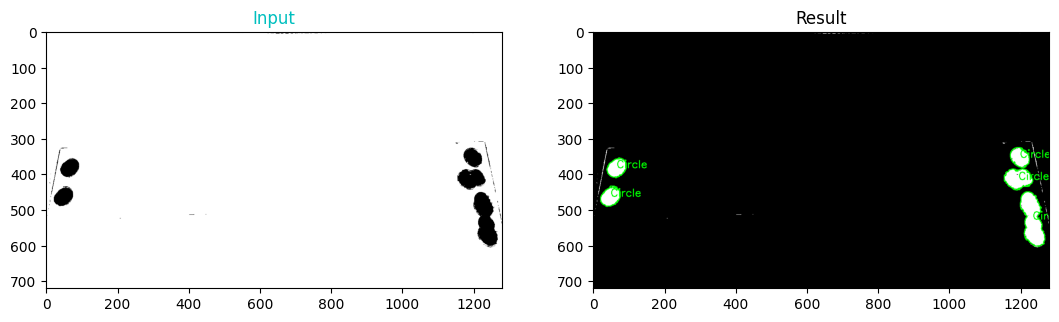

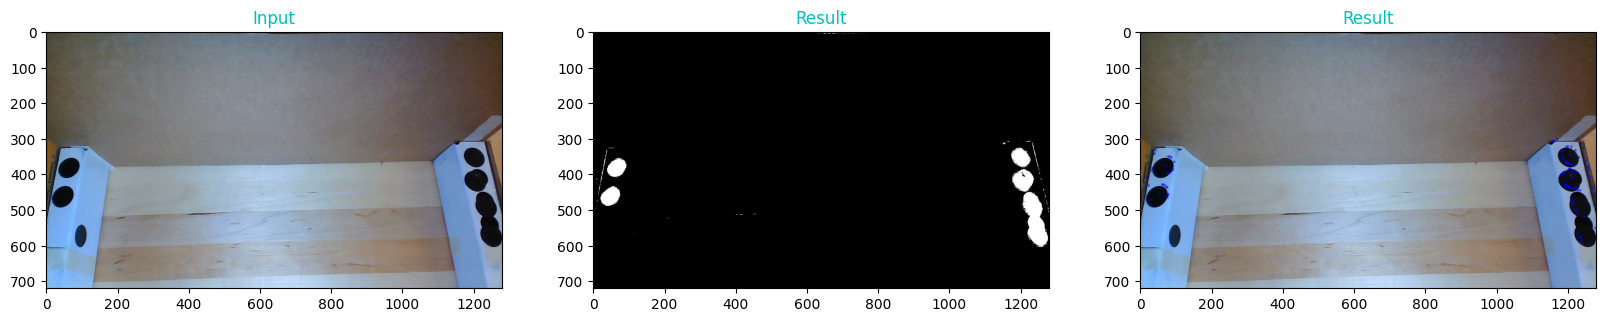

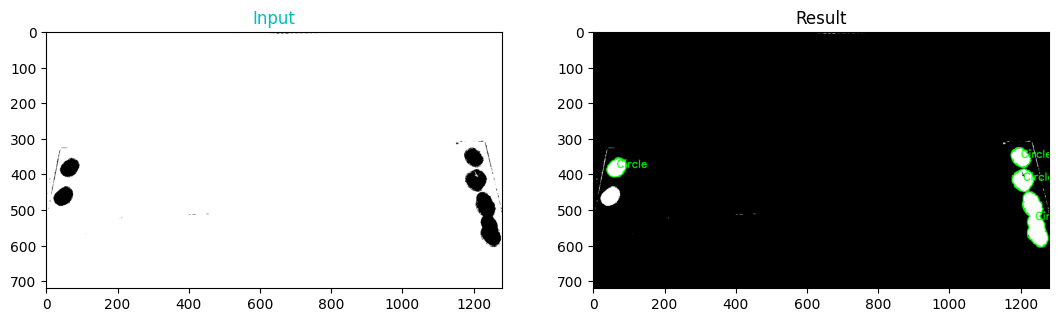

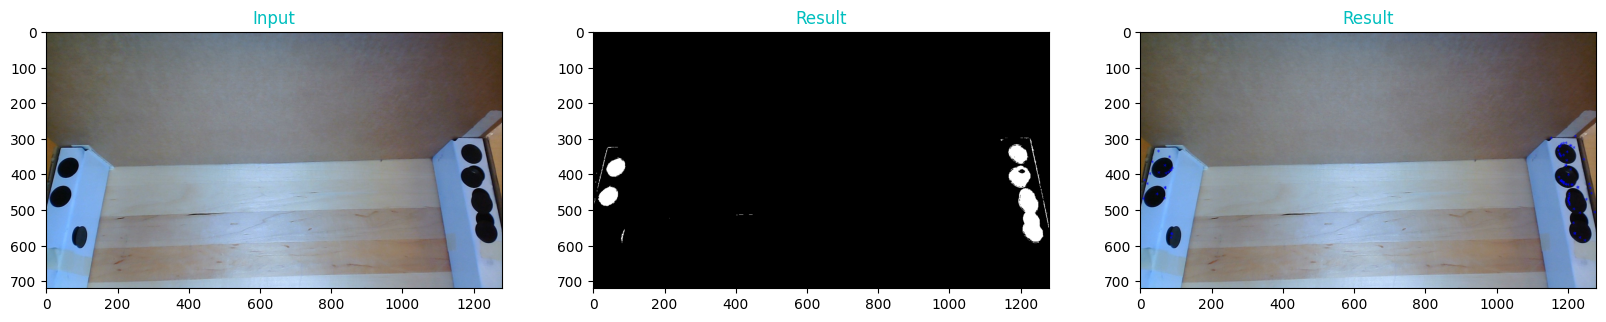

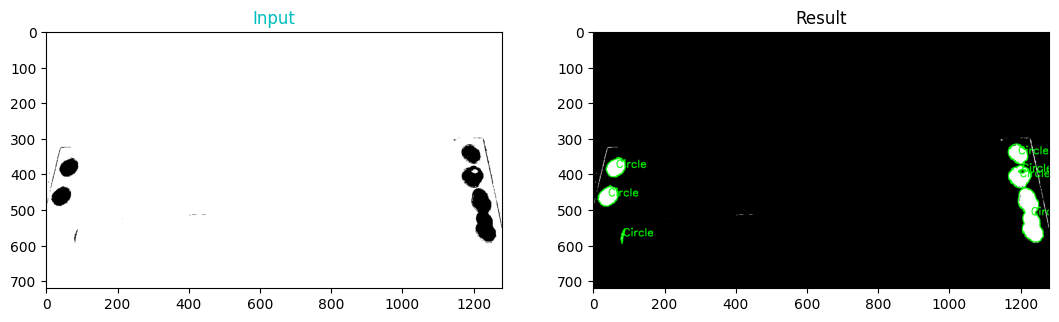

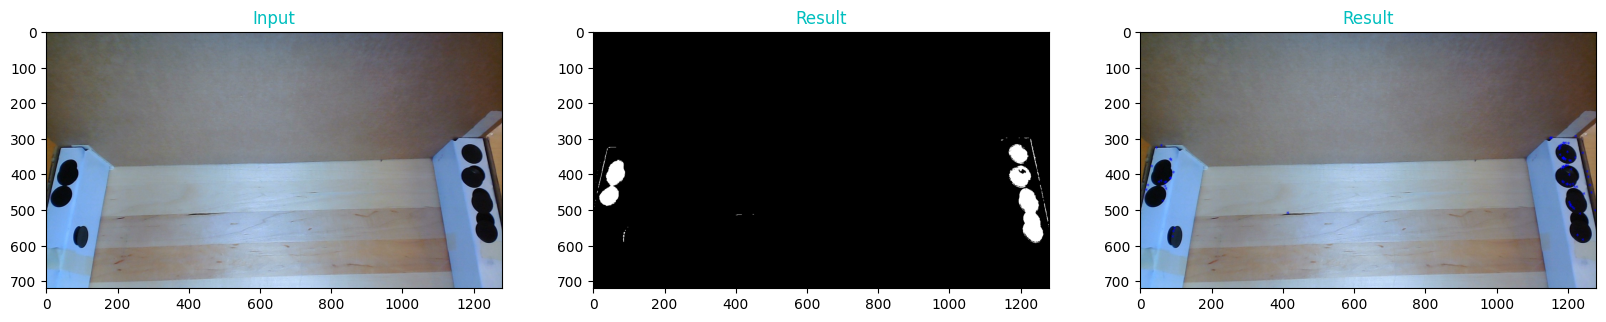

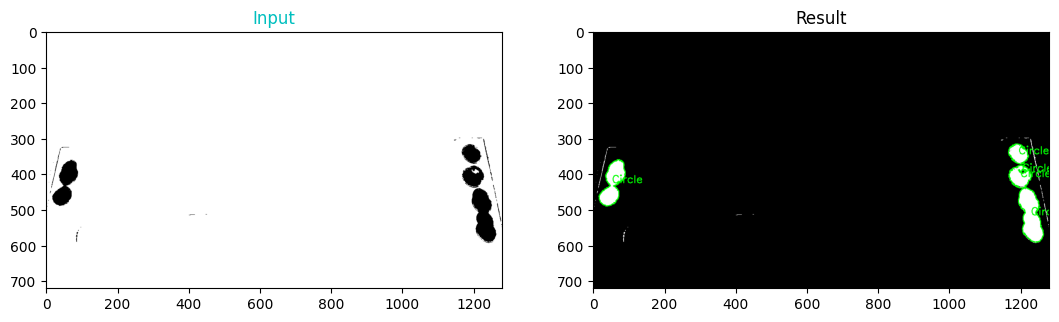

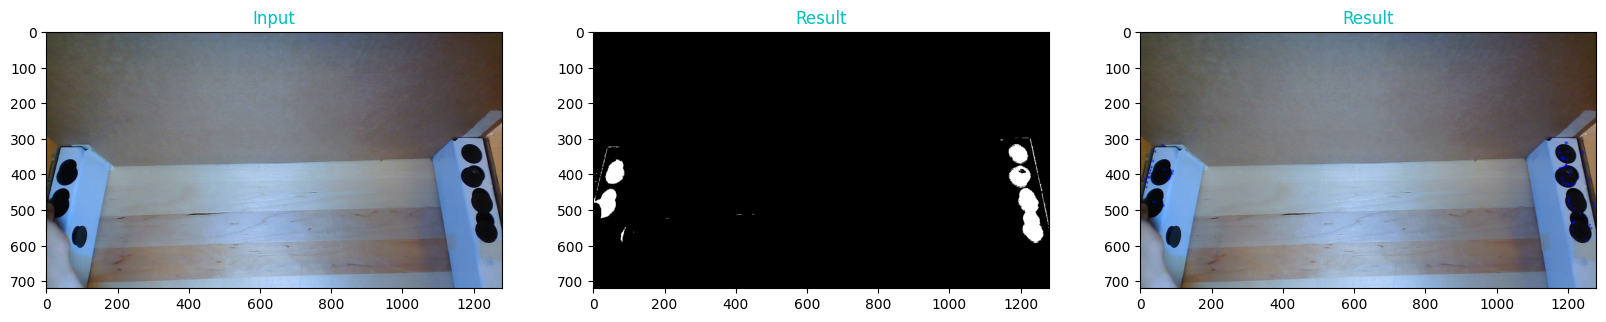

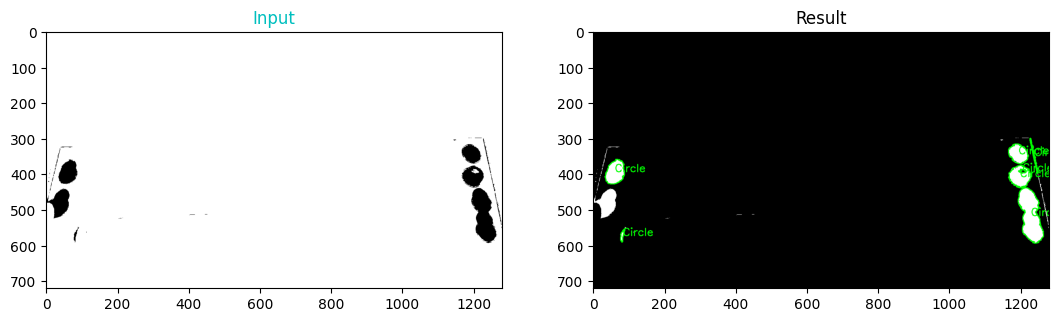

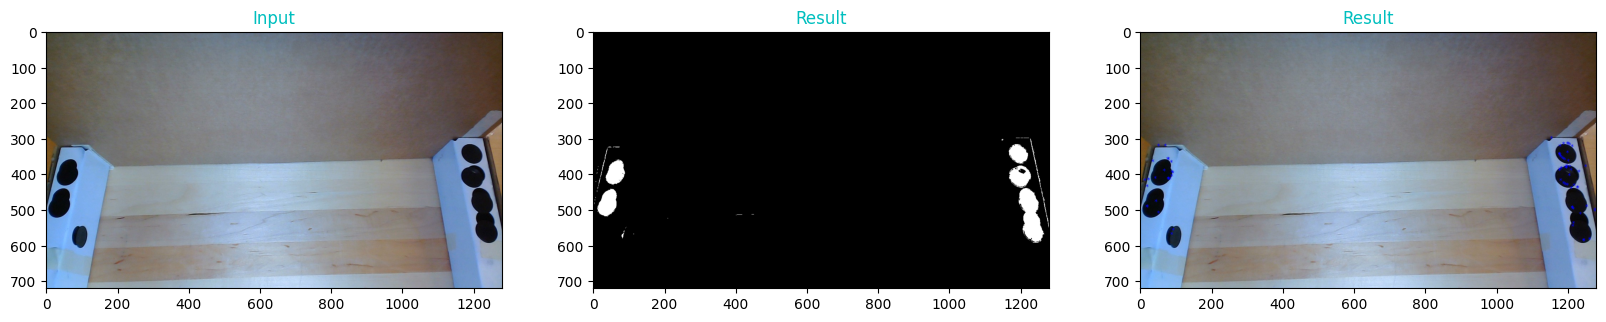

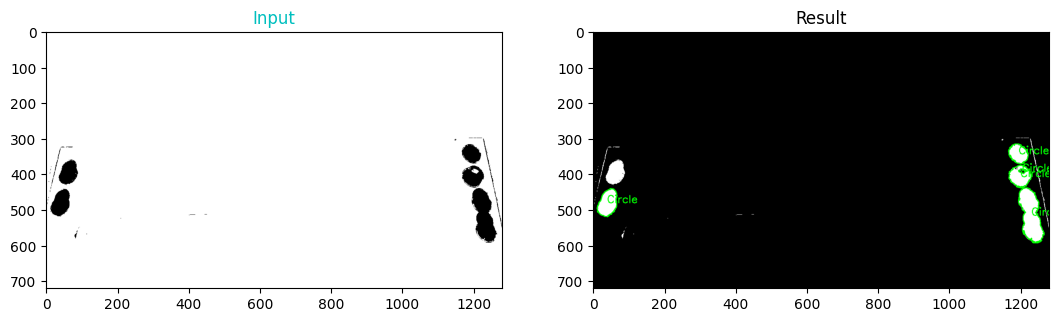

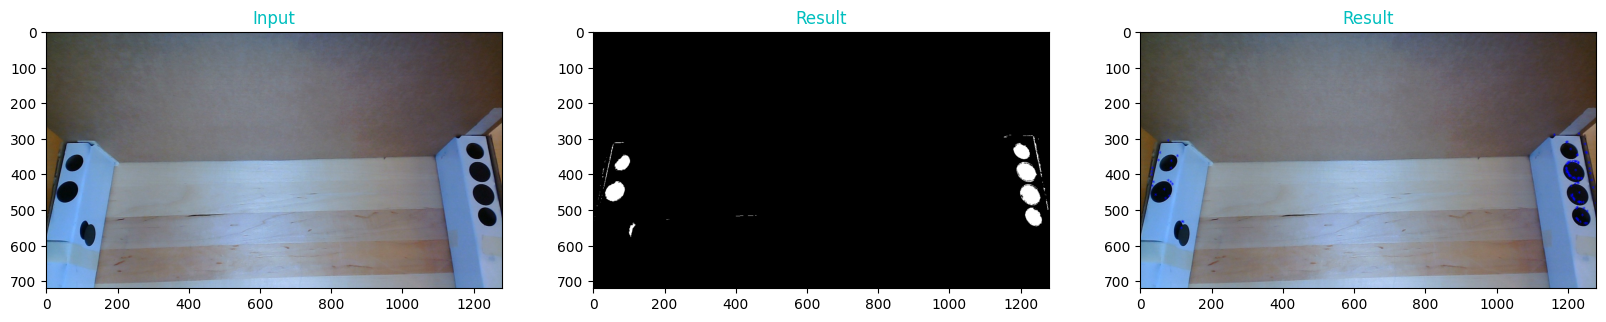

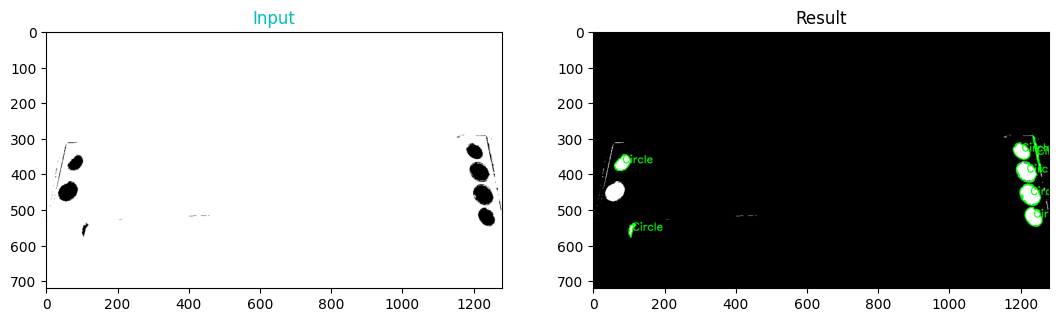

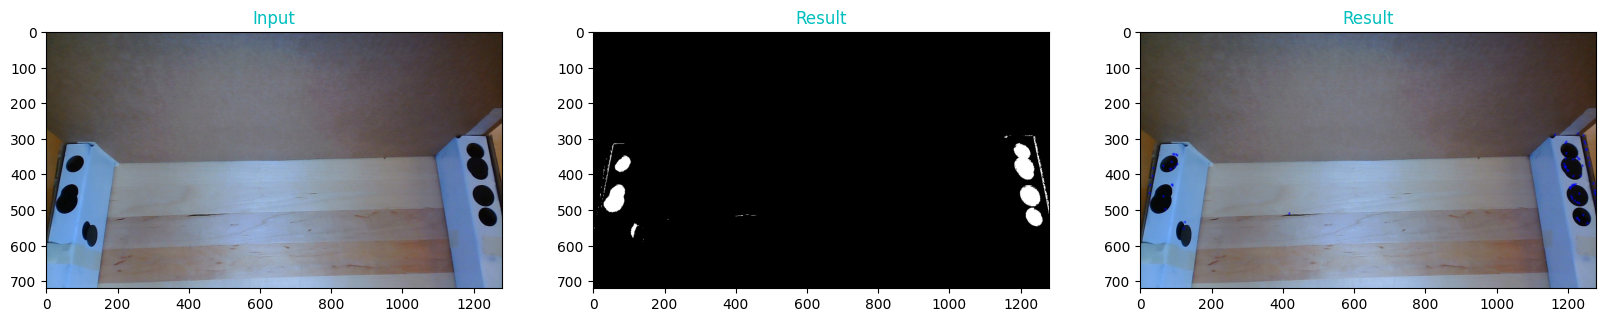

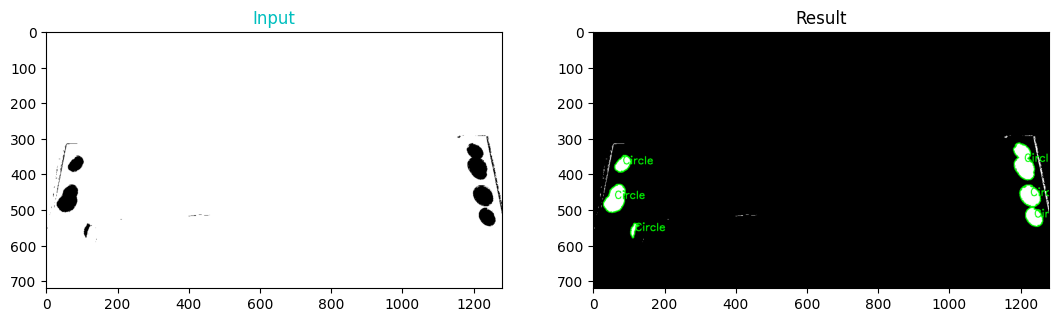

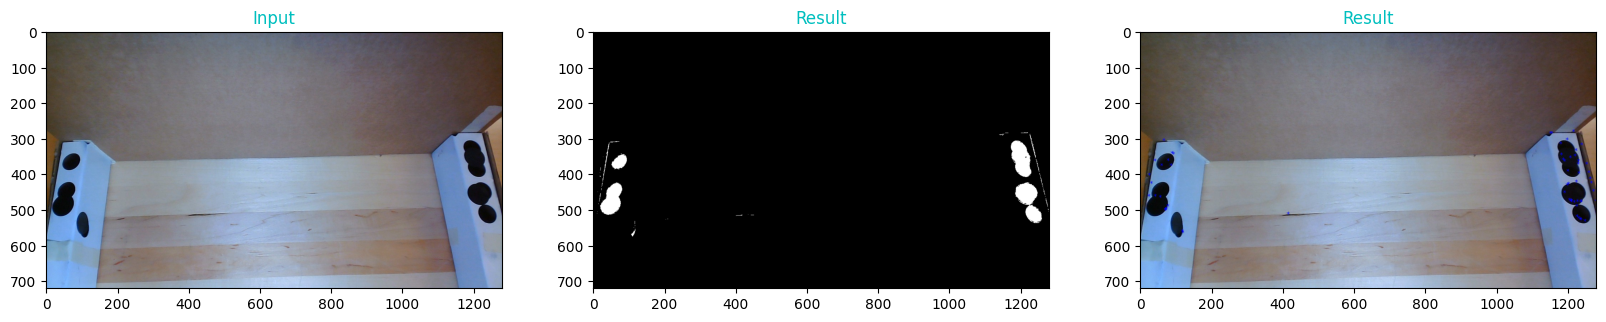

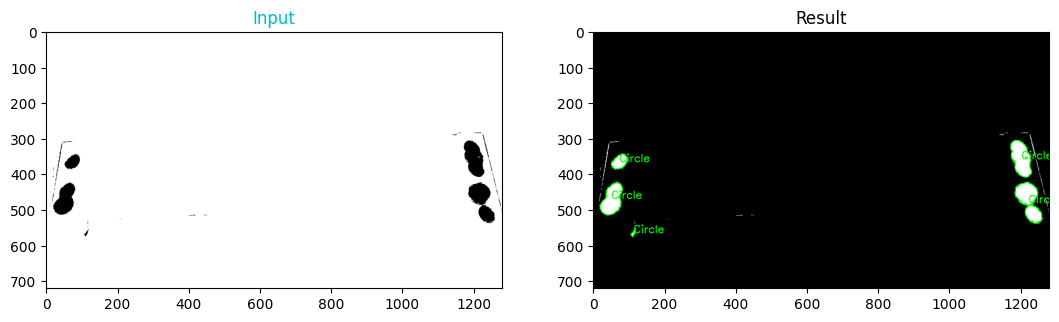

이미지 추출이 완료되었습니다.


In [ ]:
#HSV Based
def detectColorObjectsfororiginal(path_to_img,find_color=None): 
    if isinstance(path_to_img, str):
        img = cv2.imread(path_to_img)
    else:
        img = path_to_img.copy()
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    if find_color == 'black':
      BlackLower = np.array([0, 0, 0])
      BlackUpper = np.array([180, 255, 30])
      img_mask = cv2.inRange(img_hsv, BlackLower, BlackUpper)
      masked_out = cv2.bitwise_and(img, img, mask=img_mask)

    return img, img_mask

def detectColorObjectsforcrop(path_to_img,find_color=None): 
    if isinstance(path_to_img, str):
        img = cv2.imread(path_to_img)
    else:
        img = path_to_img.copy()
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    if find_color == 'black':
      BlackLower = np.array([0, 0, 0])
      BlackUpper = np.array([64, 64, 64])
      img_mask = cv2.inRange(img_hsv, BlackLower, BlackUpper)
      masked_out = cv2.bitwise_and(img, img, mask=img_mask)

    return img, img_mask

def markDetectdObjects(og_img,masked_img):
    # Find Blue Contours
    (contours,_)=cv2.findContours(masked_img,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    FinImg = og_img.copy()
    for pic, contour in enumerate(contours):
        area = cv2.contourArea(contour)
        if(area):
            x,y,w,h = cv2.boundingRect(contour)
            # FinImg = cv2.rectangle(og_img,(x,y),(x+w,y+h),(0,0,255),2)
            cv2.putText(FinImg,"*",(int(x+w/2),int(y+h/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,0,0))
            # BaseCord = np.array([x+h+round(w/2), y+h+round(w/2)])
    plt.figure(figsize=(20,10))
    plt.subplot(131),plt.imshow(cv2.cvtColor(og_img,cv2.COLOR_BGR2RGB)),plt.title('Input',color='c')
    plt.subplot(132),plt.imshow(cv2.cvtColor(masked_img,cv2.COLOR_BGR2RGB)),plt.title('Result',color='c')
    plt.subplot(133),plt.imshow(cv2.cvtColor(FinImg,cv2.COLOR_BGR2RGB)),plt.title('Result',color='c')
    plt.show()
    return masked_img

def detectShapes(img_):
    img = img_.copy()
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, img_Otsubin = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(img_Otsubin.copy(), 1, 2)

    circles = []  # 원형 좌표를 저장할 리스트

    for num,cnt in enumerate(contours):
        x,y,w,h = cv2.boundingRect(cnt)
        approx = cv2.approxPolyDP(cnt,0.01*cv2.arcLength(cnt,True),True)
        if len(approx) > 10 and cv2.contourArea(cnt) > 100:
            circles.append((x, y, w, h))  # 원형의 좌표를 리스트에 추가
            
            cv2.putText(img,"Circle",(int(x+w/2),int(y+h/2)),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
            cv2.drawContours(img,[cnt],-1,(0,255,0),2)
            
    plt.figure(figsize=(20,10))
    plt.subplot(131),plt.imshow(cv2.cvtColor(img_Otsubin,cv2.COLOR_BGR2RGB)),plt.title('Input',color='c')
    plt.subplot(132),plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)),plt.title('Result')
    plt.show()
    
    return circles
    detectShapes(original)

output_directory = "/content/gdrive/MyDrive/Toyota_data_White"
os.makedirs(output_directory, exist_ok=True)

for i in range(len(Origin_image)):
    path_to_img = Origin_image[i]
    img, maskedImg = detectColorObjectsfororiginal(path_to_img, find_color='black')
    original = markDetectdObjects(img, maskedImg)
    original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
    circles = detectShapes(original_rgb)

    for j, circle in enumerate(circles):
        x, y, w, h = circle
        extracted_circle = img[y:y+h, x:x+w].copy()  # 원본 이미지에서 원형 부분을 잘라냅니다.
        save_path = os.path.join(output_directory, f"circle_{i+1}_{j+1}.jpg")
        cv2.imwrite(save_path, extracted_circle)

print("이미지 추출이 완료되었습니다.")


